# Salary Predictions Based on Job Descriptions

<p> The goal of this project is to predict the future employee salaries based on the real data (online job board) of current employees slaries which is dependent on the parameters like "company", "job title", "education",  work experience". </p>

In [1]:
""" Goal of this script is to load, explores, and visualizes the salary prediction datasets """

__author__ = "Robin Yadav"
__email__ = "yrobins95@gmail.com"

In [2]:
""" importing libraries """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

""" Importing function from files """
import import_ipynb
import plot_job_features
from plot_job_features import plot_features

importing Jupyter notebook from plot_job_features.ipynb


### Load the datasets

In [3]:
""" 
    load the data into a Pandas dataframe
    And display first 5 rows from dataframe 
    
"""

train_features_df = pd.read_csv('data-SalaryPredictions/data/train_features.csv')
## Examine the train features data ##
print("\nTrain Features Dataframe: ")
display(train_features_df.head())

train_target_df = pd.read_csv('data-SalaryPredictions/data/train_salaries.csv')
## Examine the target data ##
print("\n\nTrain Salaries (Target) Dataframe: ")
display(train_target_df.head())

test_features_df = pd.read_csv('data-SalaryPredictions/data/test_features.csv')
print("\n\nTest Features Dataframe: ")
## Examine the test features data ##
display(test_features_df.head())



Train Features Dataframe: 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16




Train Salaries (Target) Dataframe: 


,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163




Test Features Dataframe: 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [4]:
""" Train dataframe: Merging train features dataframe and target(salary) dataframe """

train_df = pd.merge(train_features_df, train_target_df, on = 'jobId') # jobID columns in both dfs
display(train_df.head())

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [5]:
df = train_df[['yearsExperience', 'milesFromMetropolis']]
df

,yearsExperience,milesFromMetropolis
0,10,83
1,3,73
2,10,38
3,8,17
4,8,16
...,...,...
999995,19,94
999996,12,35
999997,16,81
999998,6,5


### Clean the data: Data Wrangling
#### Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<ul>
    <li>Identify and handle missing values
        <ul>
            <li>Nested Identify missing values</li>
            <li>Nested Deal with missing values</li>
            <li>Nested Correct data format</li>
        </ul>
    </li>
    <li>Data standardization</li>
    <li>Data Normalization (centering/scaling)</li>
    <li>Binning</li>
    <li>Indicator variable</li>
</ul>

**Identify the missing data**
<p> We can replace "missing data" with NaN (Not a Number), which is Python's default missing value marker. <br>
  .replace(A, B, inplace = True)  <br>
    to replace A by B </p>

In [6]:
""" 
    For example: 
    if dataframe contains "?", then we can replace "?" to NaN
"""

train_df.replace("?", np.nan, inplace = True)
train_df.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


**Evaluating for Missing Value**
<p> 
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

    1 .isnull()
    2 .notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. </p>

In [7]:
# count the number of missing data and then proceed
missing_data = train_df.isnull()
print("Below Results shows there are no missing data in first 5 samples (or rows) ")
display(missing_data.head())

Below Results shows there are no missing data in first 5 samples (or rows) 


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


<p>True means "missing data" and False means "not missing data" </p>

<br>

**It is always prefered to know the missing data in the datasets**
<p>We can count the missing data in each columns as illustrated in following steps: </p>

In [8]:
# checking the columns header
missing_data.columns.values.tolist()

['jobId',
 'companyId',
 'jobType',
 'degree',
 'major',
 'industry',
 'yearsExperience',
 'milesFromMetropolis',
 'salary']

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    display(missing_data[column].value_counts())
    print("")

jobId


False    1000000
Name: jobId, dtype: int64


companyId


False    1000000
Name: companyId, dtype: int64


jobType


False    1000000
Name: jobType, dtype: int64


degree


False    1000000
Name: degree, dtype: int64


major


False    1000000
Name: major, dtype: int64


industry


False    1000000
Name: industry, dtype: int64


yearsExperience


False    1000000
Name: yearsExperience, dtype: int64


milesFromMetropolis


False    1000000
Name: milesFromMetropolis, dtype: int64


salary


False    1000000
Name: salary, dtype: int64

<p>Above results shows that there are no missing data in job predictions datasets <br>
    <br>
</p>

#### Assume there are missing data in the above datasets. How to manage those missing data?

1. drop data <br> 
    a. drop the whole row  - It is prefer to drop whole row only if there are lots of missing data<br>
    b. drop the whole column - It is prefer to drop whole coulmn only if there are lots of missing data <br>
2. replace data - It is prefer to replace data if there are few missing data <br>
    a. replace it by mean <br>
    b. replace it by frequency <br>
    c. replace it based on other functions <br>
    <br>
    
#### Example :
avg_COLNAME = df['COLUMNNAME'].astype('float').mean(axis=0) <br>
print("Average of COLNAME:", avg_COLNAME) <br>
df['COLUMNNAME'].replace(np.nan, avg_COLNAME, inplace=True) <br>

**Note: Rows and columns can also be replaced by frequency by counting the maximum number of occurence of the items in the column or row**

#### Correct data format <br>
It is really important to know and correct data format (int, float, text or other). <br>

In Pandas, we use <br>
.dtype() to check the data type <br>
.astype() to change the data type <br>

In [10]:
train_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

From above it is found that all the data types are in correct format <br>
#### What if the data are not in correct format? <br>

#### Example: <br>
df[["ColumnName1", "ColumnName2"]] = df[["ColumnName1", "ColumnName2"]].astype("float") <br>
df[["ColumnName3"]] = df[["ColumnName3"]].astype("int")

### Data Standardization
- Standardization is the process of transforming data into a common format.
\begin{align}
standard = \frac{X - \mu}{\sigma}
\end{align}
Here, $X$ is observation, $\mu$ is mean, and $\sigma$ is standard deviation

Following steps can be followed to standarized the data: <br>
1. from sklearn import preprocessing
##### Get column names first
2. names = df.columns
##### Create the Scaler object
3. scaler = preprocessing.StandardScaler()
##### Fit your data on the scaler object
4. scaled_df = scaler.fit_transform(df) <br>
   scaled_df = pd.DataFrame(scaled_df, columns=names)
   
### Data Normalization
- Normalizations include scaling the variable so the variable average is 0, and the variance is 1 i.e., variable value range between 0 and 1.
\begin{align}
normalize = \frac{X - min(X)}{max(X) - min(X)}
\end{align}

Following steps can be followed to normalize the data: <br>
1. from sklearn import preprocessing <br>
   import numpy as np
2. colname_array = np.array(df['COLUMNNAME']) <br>
   normalized_colname = preprocessing.normalize([colname_array])

### Binning
- Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. <br>
- Usually used histogram to analyze the data

In [11]:
""" look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it """

### Check for duplicate ###
train_features_df.duplicated().sum()

0

In [12]:
train_target_df.duplicated().sum()

0

In [13]:
test_features_df.duplicated().sum()

0

### Explore the data (EDA) 

In [14]:
""" Information: Identify numerical and categorical variables """

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [15]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

### Separating columns with numerical data from categorical data - Useful during modelling 

In [16]:

numeric_cols = ['yeasExperience', 'milesFromMetropolis']
numeric_cols

['yeasExperience', 'milesFromMetropolis']

In [17]:
categorical_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
categorical_cols

['companyId', 'jobType', 'degree', 'major', 'industry']

###  Summarize numerical and categorical variables 

In [18]:
train_features_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [19]:
train_features_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684805667,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [20]:
# Function for correlation plot
def corr_mat(data):
    corr = data.corr()
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
    plt.title('Heatmap of Correlation Matrix')
    return (corr)

In [21]:
display(train_df.columns)

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


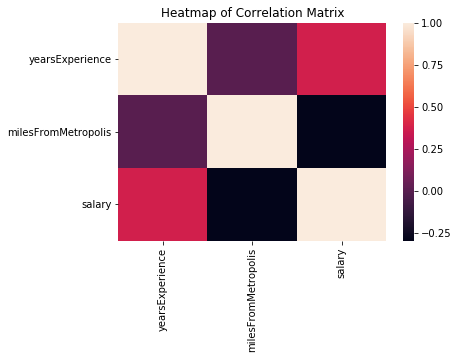

In [22]:
train_corr =train_df[['yearsExperience', 'milesFromMetropolis','salary']]

corr_mat(train_corr)

### Indicator variable (or dummy variable)
- An indicator variable (or dummy variable) is a numerical variable used to label categories. 

In [23]:
dummy_variable_1 = pd.get_dummies(train_df['companyId'])
# display(dummy_variable_1.head())

# 'degree', 'major', 'industry'
dummy_variable_2 = pd.get_dummies(train_df['jobType'])
# display(dummy_variable_2.head())

dummy_variable_3 = pd.get_dummies(train_df['degree'])
# display(dummy_variable_3.head())

dummy_variable_4 = pd.get_dummies(train_df['major'])
# display(dummy_variable_4.head())

dummy_variable_5 = pd.get_dummies(train_df['industry'])
# display(dummy_variable_5.head())


train_df_dummy = pd.concat([dummy_variable_1, dummy_variable_2, dummy_variable_3, dummy_variable_4, dummy_variable_5], axis=1)
train_df =  pd.concat([train_df, train_df_dummy], axis = 1)
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Columns: 101 entries, jobId to WEB
dtypes: int64(3), object(6), uint8(92)
memory usage: 164.0+ MB
None


### Visualize target variable (Salary)

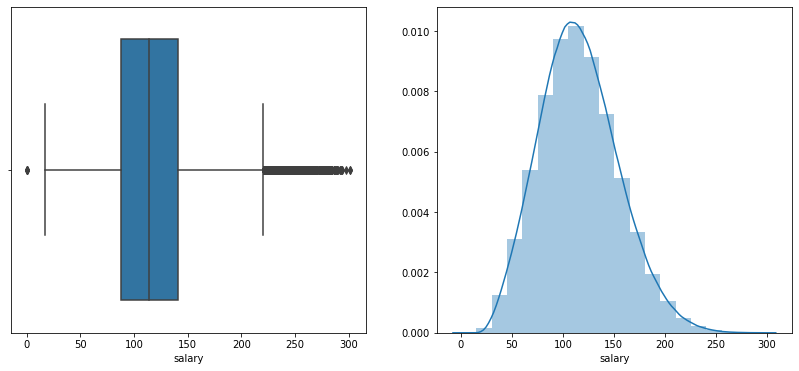

In [24]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

### Use IQR rule to identify potential outliers

In [25]:
stat =  train_df.salary.describe()
print(stat)

IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5


### Examine potential outliers

In [26]:
""" potential outliers below lower bound """
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,COMP0,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0,0,...,1,0,0,1,0,0,0,0,0,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0,0,...,0,1,0,0,0,0,0,1,0,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0,0,...,0,1,0,1,0,0,0,0,0,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0,0,...,0,0,0,0,0,1,0,0,0,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
""" potential outliers above upper bound """
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()


CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [28]:
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,COMP0,...,MATH,NONE,PHYSICS,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225,0,...,0,0,0,0,0,0,0,1,0,0
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246,0,...,0,0,0,0,0,0,0,1,0,0
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225,0,...,0,0,0,0,0,1,0,0,0,0
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248,0,...,0,0,0,0,0,1,0,0,0,0
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223,0,...,0,0,0,0,0,1,0,0,0,0
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226,0,...,0,0,0,0,0,0,0,0,0,1
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226,0,...,0,0,0,0,0,0,0,1,0,0
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227,0,...,0,0,0,0,0,0,0,1,0,0
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230,0,...,0,0,0,0,0,0,0,1,0,0
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
""" Remove data with zero salaries """
train_df = train_df[train_df.salary > 8.5]

In [30]:
# plot_features(train_df, 'companyId')

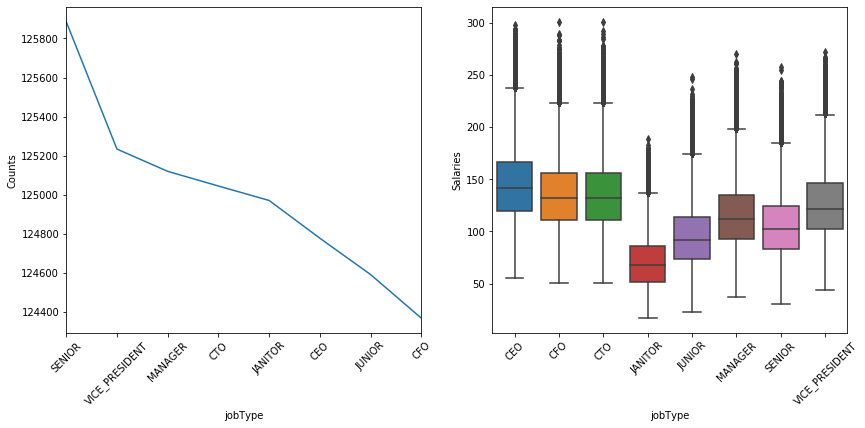

In [31]:
plot_features(train_df, 'jobType')

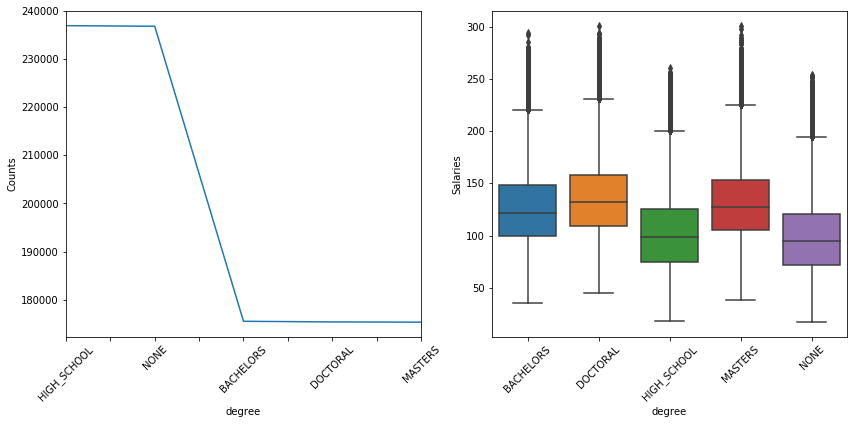

In [32]:
plot_features(train_df, 'degree')

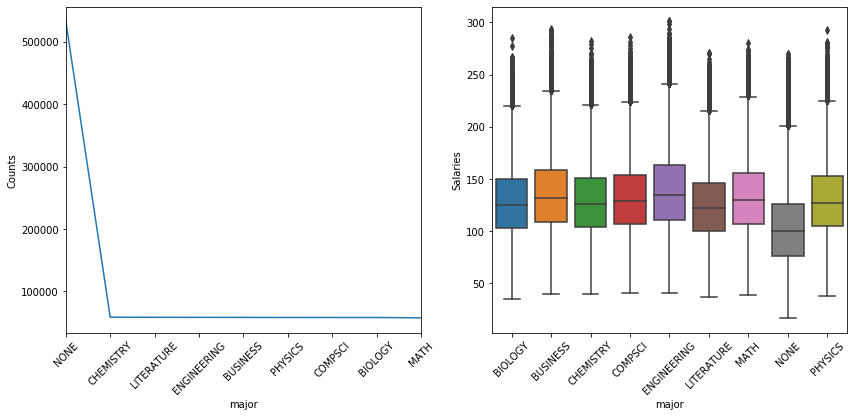

In [33]:
plot_features(train_df, 'major')

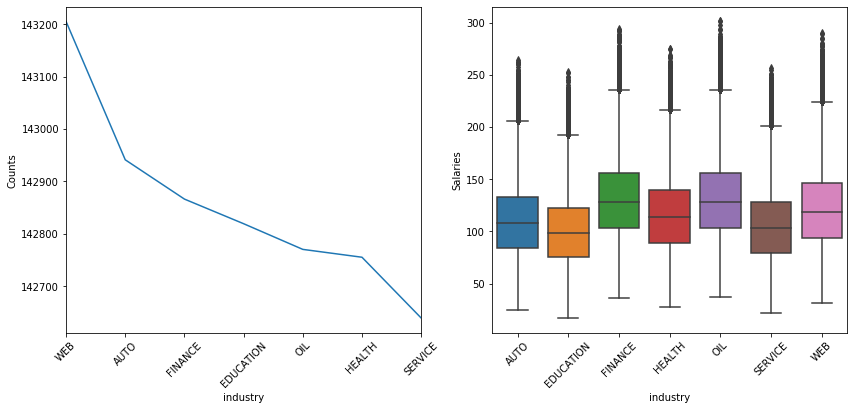

In [34]:
plot_features(train_df, 'industry')

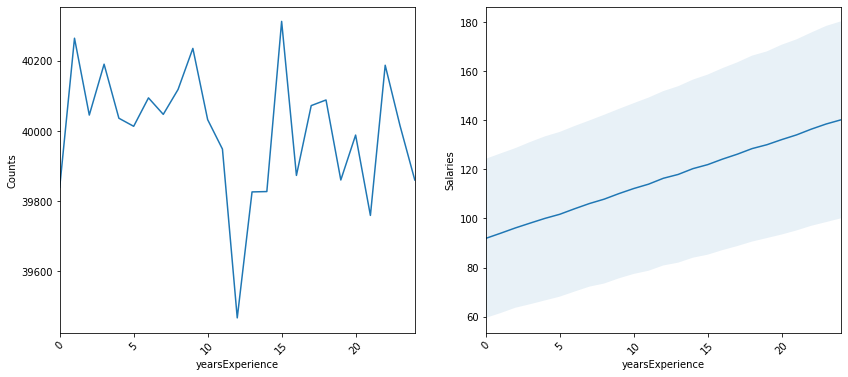

In [35]:
plot_features(train_df, 'yearsExperience')

In [36]:
# plot_features(train_df, 'milesFromMetropolis')